# Credit Risk Project 

## Introduction & Project Goals
After the financial crisis in 2008 banks and other lenders have had quite the journey when it comes to improving their ability to predit risky and non risky customers. 
In addition, there are strict regulations toward what features they can use and how to avoid discrimination over a certain protected class.

### The goals for this project are:
- To find the best features that predict the probabilty of default
- Produce a model that predicts default probability with high accuracy
- According to the stake holder's discretion or the economic period, pick a model with the fewest false negatives or the fewest false positives 


TN: True Negative: (good Prediction): I estimated customer as not defaulter and the actual figures register customer as not defaulted (no differences between predicted and actual default).

FN: False Negative: (bad Prediction): I estimated customer as not defaulter but, defaults

TP: True Positive: (good Prediction): I predicted customer as defaulter and indeed customer defaulted

FP: False Positive or Type I Error (bad prediction): I predicted applicant as defaulter customer, but the customer actually didn’t default.

### Data dictionary
- person_age  - Age
- person_income	- Annual Income
- person_home_ownership -	Home ownership
- person_emp_length - Employment length (in years)
- loan_intent - Loan intent
- loan_grade - Loan grade
- loan_amnt - Loan amount
- loan_int_rate - Interest rate
- loan_status - Loan status (0 is non default 1 is default)
- loan_percent_income	- Percent income
- cb_person_default_on_file	- Historical default
- cb_preson_cred_hist_length - Credit history length

## Executive Summary

In [1]:
conda install -c conda-forge lightgbm


Solving environment: - 
  - anaconda/osx-64::certifi-2021.10.8-py39hecd8cb5_0
  - defaults/osx-64::certifi-2021.10.8-py39hecd8cb5done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [2]:
#import libraries
import pandas as pd
import numpy as np
import acquire
import modeling_scaling
#visualization libraries 
import matplotlib.pyplot as plt
import seaborn as sns
import sys
pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split, learning_curve, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import plot_precision_recall_curve
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report
from lightgbm import LGBMClassifier



# Data Acquisition 

In [3]:
df = pd.read_csv("credit_risk_dataset.csv")
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [5]:
df= acquire.wrangle(df)

In [6]:
train, validate, test=acquire.split_credit_defult_df(df)
train.shape, validate.shape, test.shape

((18152, 11), (7780, 11), (6484, 11))

# Data Preparation

In [7]:
train

,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
20568,102000,RENT,3.0,HOMEIMPROVEMENT,A,10000,6.03,0,0.10,N,8
11177,72000,MORTGAGE,8.0,VENTURE,B,18000,11.86,0,0.25,N,4
25160,80000,OWN,12.0,HOMEIMPROVEMENT,C,9000,11.97,0,0.11,N,7
17775,68000,RENT,1.0,VENTURE,E,14400,17.99,1,0.21,N,2
11258,72444,MORTGAGE,7.0,HOMEIMPROVEMENT,B,25000,10.74,0,0.35,N,4
...,...,...,...,...,...,...,...,...,...,...,...
21507,26000,RENT,6.0,PERSONAL,B,6000,10.75,0,0.23,N,10
1882,165000,RENT,3.0,EDUCATION,A,14950,6.62,0,0.09,N,3
1605,34980,RENT,3.0,DEBTCONSOLIDATION,C,1500,12.23,1,0.04,Y,4
23323,68120,RENT,6.0,EDUCATION,B,8000,10.00,0,0.12,N,5


#### Dropping age (discriminatory) will have both approaches to decide definitively 
#### Additionally dropped nulls for mvp, will revisit imputer on second go


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18152 entries, 20568 to 15560
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_income               18152 non-null  int64  
 1   person_home_ownership       18152 non-null  object 
 2   person_emp_length           17656 non-null  float64
 3   loan_intent                 18152 non-null  object 
 4   loan_grade                  18152 non-null  object 
 5   loan_amnt                   18152 non-null  int64  
 6   loan_int_rate               16461 non-null  float64
 7   loan_status                 18152 non-null  int64  
 8   loan_percent_income         18152 non-null  float64
 9   cb_person_default_on_file   18152 non-null  object 
 10  cb_person_cred_hist_length  18152 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 1.7+ MB


In [9]:
for col in train:
    print(col, "--->", train[col].nunique())
    if train[col].nunique()<20:
        print(train[col].value_counts(normalize = True)*100)
    print()

person_income ---> 2895

person_home_ownership ---> 4
RENT        50.479286
MORTGAGE    41.472014
OWN          7.718158
OTHER        0.330542
Name: person_home_ownership, dtype: float64

person_emp_length ---> 32

loan_intent ---> 6
EDUCATION            19.832525
MEDICAL              18.620538
VENTURE              17.546276
PERSONAL             17.039445
DEBTCONSOLIDATION    15.932129
HOMEIMPROVEMENT      11.029088
Name: loan_intent, dtype: float64

loan_grade ---> 7
A    33.092772
B    31.930366
C    20.107977
D    10.957470
E     2.991406
F     0.749229
G     0.170780
Name: loan_grade, dtype: float64

loan_amnt ---> 666

loan_int_rate ---> 331

loan_status ---> 2
0    78.211767
1    21.788233
Name: loan_status, dtype: float64

loan_percent_income ---> 74

cb_person_default_on_file ---> 2
N    82.321507
Y    17.678493
Name: cb_person_default_on_file, dtype: float64

cb_person_cred_hist_length ---> 29



In [10]:
train.describe()

,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,1.815200e+04,17656.000000,18152.000000,16461.000000,18152.000000,18152.000000,18152.000000
mean,6.603990e+04,4.787834,9603.235181,11.004233,0.217882,0.170125,5.790987
std,6.670860e+04,4.123066,6336.872473,3.235915,0.412818,0.106130,4.057062
min,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,3.840000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,8.000000e+04,7.000000,12300.000000,13.470000,0.000000,0.230000,8.000000
max,6.000000e+06,123.000000,35000.000000,22.480000,1.000000,0.780000,30.000000


In [11]:
# person employment length of 123 is not wuite the norm. Therefore in this case I come up with an average work tenure of 65

train.loc[train["person_emp_length"]>65,:]

,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
210,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,0,0.1,N,4


In [12]:
# getting rid of 123 employment years
train = train.loc[train["person_emp_length"]<65,:]

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17655 entries, 20568 to 15560
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_income               17655 non-null  int64  
 1   person_home_ownership       17655 non-null  object 
 2   person_emp_length           17655 non-null  float64
 3   loan_intent                 17655 non-null  object 
 4   loan_grade                  17655 non-null  object 
 5   loan_amnt                   17655 non-null  int64  
 6   loan_int_rate               16005 non-null  float64
 7   loan_status                 17655 non-null  int64  
 8   loan_percent_income         17655 non-null  float64
 9   cb_person_default_on_file   17655 non-null  object 
 10  cb_person_cred_hist_length  17655 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 1.6+ MB


In [14]:
train.head()

,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
20568,102000,RENT,3.0,HOMEIMPROVEMENT,A,10000,6.03,0,0.10,N,8
11177,72000,MORTGAGE,8.0,VENTURE,B,18000,11.86,0,0.25,N,4
25160,80000,OWN,12.0,HOMEIMPROVEMENT,C,9000,11.97,0,0.11,N,7
17775,68000,RENT,1.0,VENTURE,E,14400,17.99,1,0.21,N,2
11258,72444,MORTGAGE,7.0,HOMEIMPROVEMENT,B,25000,10.74,0,0.35,N,4


array([[<AxesSubplot:title={'center':'person_income'}>,
        <AxesSubplot:title={'center':'person_emp_length'}>,
        <AxesSubplot:title={'center':'loan_amnt'}>],
       [<AxesSubplot:title={'center':'loan_int_rate'}>,
        <AxesSubplot:title={'center':'loan_status'}>,
        <AxesSubplot:title={'center':'loan_percent_income'}>],
       [<AxesSubplot:title={'center':'cb_person_cred_hist_length'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

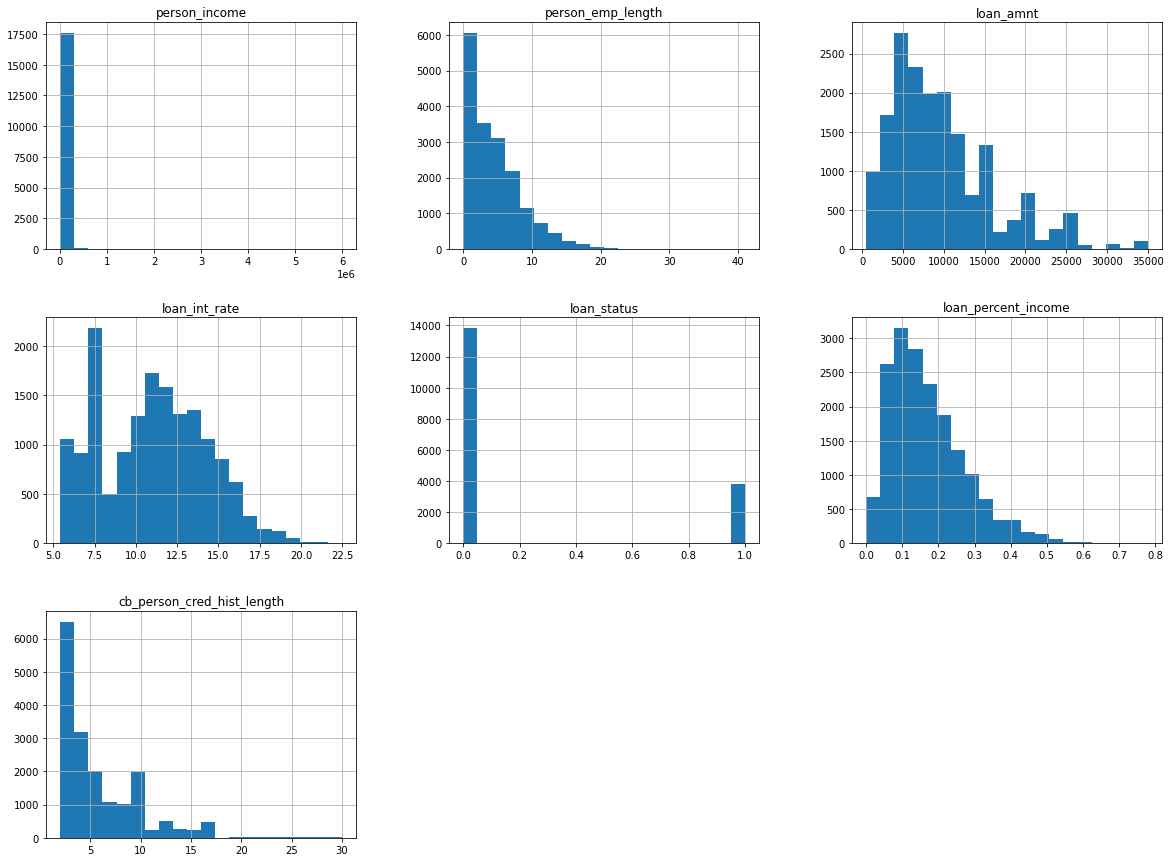

In [15]:
train.hist(bins = 20,figsize =  (20,15))


### Univariate analysis


<AxesSubplot:>

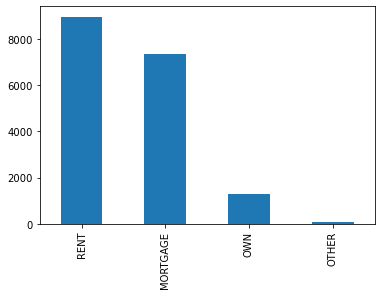

In [16]:
# plotting personal home ownership numbers
train["person_home_ownership"].value_counts().plot.bar()

#### Takeaways
It tells us that there are more people who are taking loans that are renters than those who have mortgages or own homes 

<AxesSubplot:>

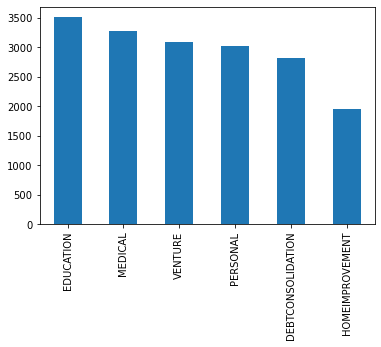

In [17]:
# plotting loan intentions
train["loan_intent"].value_counts().plot.bar()

#### Takeaways
The plot tells us that there are more people seeking loans for education. However, the difference among the reasons is not so significant

<AxesSubplot:>

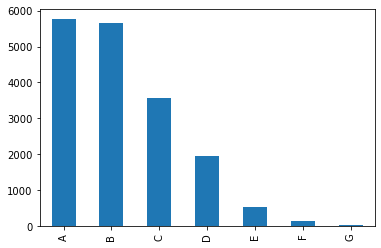

In [18]:
train["loan_grade"].value_counts().plot.bar()

<AxesSubplot:>

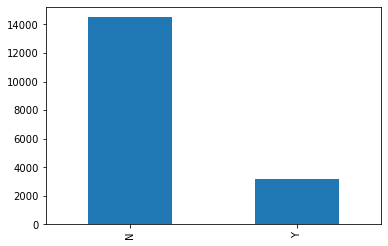

In [19]:
# visualizing the distribution of people who have defaulted
train["cb_person_default_on_file"].value_counts().plot.bar()

#### it appears that that a majority of people do not defult on their loans

In [20]:
# for i, predictor in enumerate(train.drop(columns=['partner','dependents','online_backup','senior_citizen','paperless_billing','churn','tenure', 'gender','total_charges', 'monthly_charges','contract_type_id','payment_type_id', 'internet_service_type_id','contract_type_id','phone_service','streaming_movies','streaming_tv','multiple_lines'])):
#     plt.figure(i)
#     plot= sns.countplot(data=telco_df, x=predictor, hue='churn')
#     plt.setp(plot.get_xticklabels(), rotation=45)    

In [21]:
train['cred_hist_bin'] = pd.cut(train.cb_person_cred_hist_length,[0,5,10,15,30])


In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17655 entries, 20568 to 15560
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   person_income               17655 non-null  int64   
 1   person_home_ownership       17655 non-null  object  
 2   person_emp_length           17655 non-null  float64 
 3   loan_intent                 17655 non-null  object  
 4   loan_grade                  17655 non-null  object  
 5   loan_amnt                   17655 non-null  int64   
 6   loan_int_rate               16005 non-null  float64 
 7   loan_status                 17655 non-null  int64   
 8   loan_percent_income         17655 non-null  float64 
 9   cb_person_default_on_file   17655 non-null  object  
 10  cb_person_cred_hist_length  17655 non-null  int64   
 11  cred_hist_bin               17655 non-null  category
dtypes: category(1), float64(3), int64(4), object(4)
memory usage: 1.6+ MB


In [23]:
train['cred_hist_bin'] = train['cred_hist_bin'].astype('object')


In [24]:
def plot_categorical(train):
    """this finction creates a bin for time since rest and plots the significant categorical features"""
    cat_cols = [col for col in train if train[col].dtype == "O" ]
    for i, predictor in enumerate(cat_cols):
        plt.figure(i)
        plot= sns.countplot(data=train, x=predictor, hue="cb_person_default_on_file")
        plt.setp(plot.get_xticklabels(), rotation=90) 
        sns.set(rc={'figure.figsize':(17.7,8.27)})

    return plot

<AxesSubplot:xlabel='cred_hist_bin', ylabel='count'>

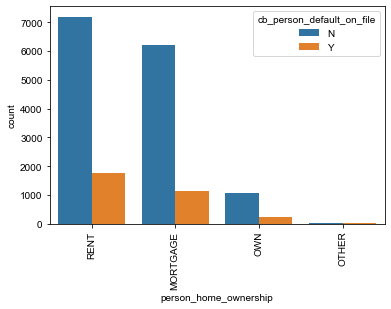

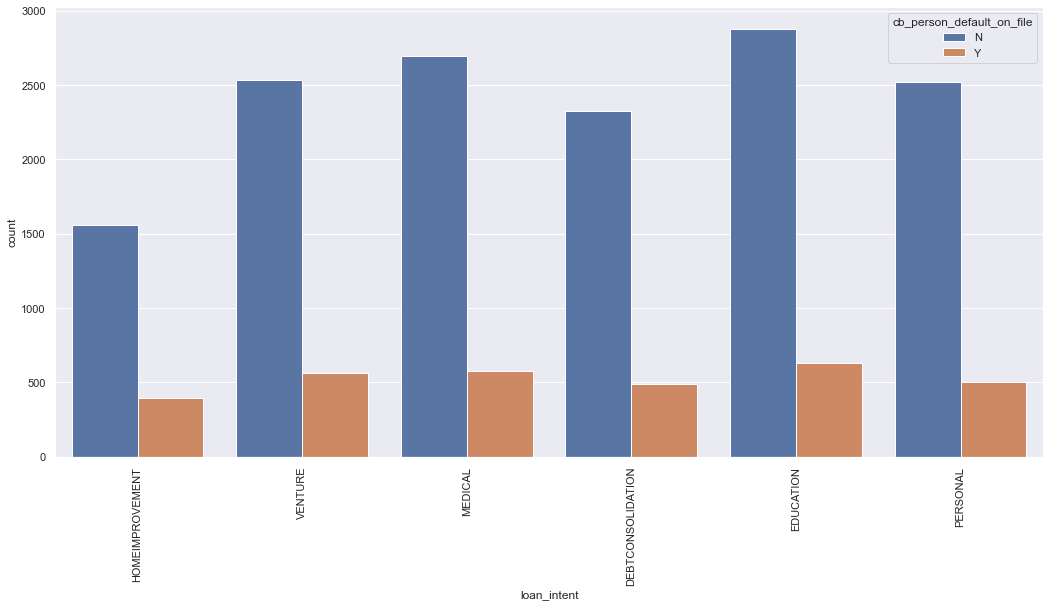

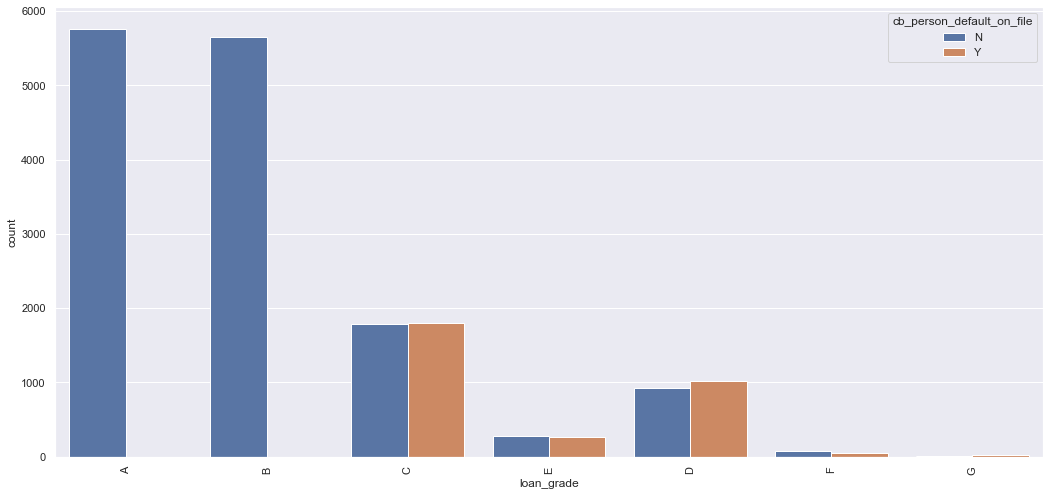

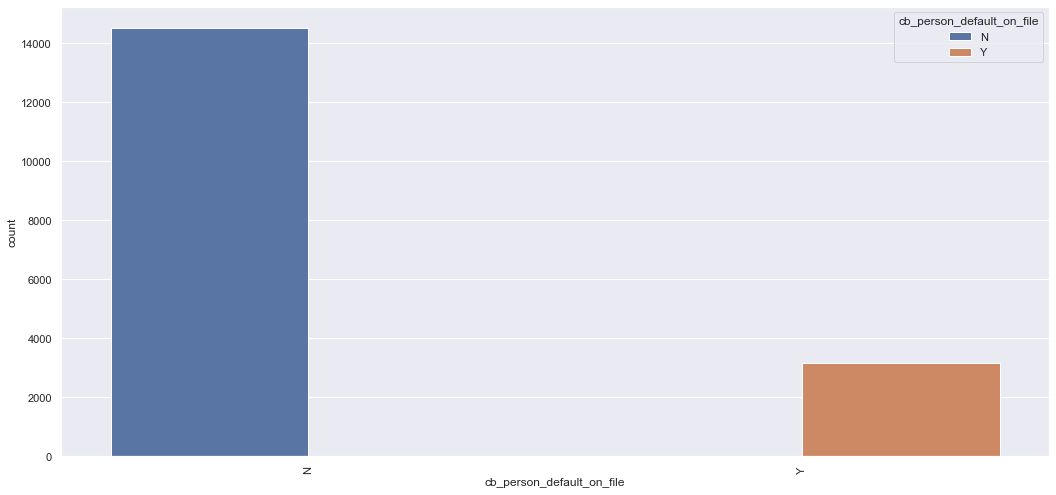

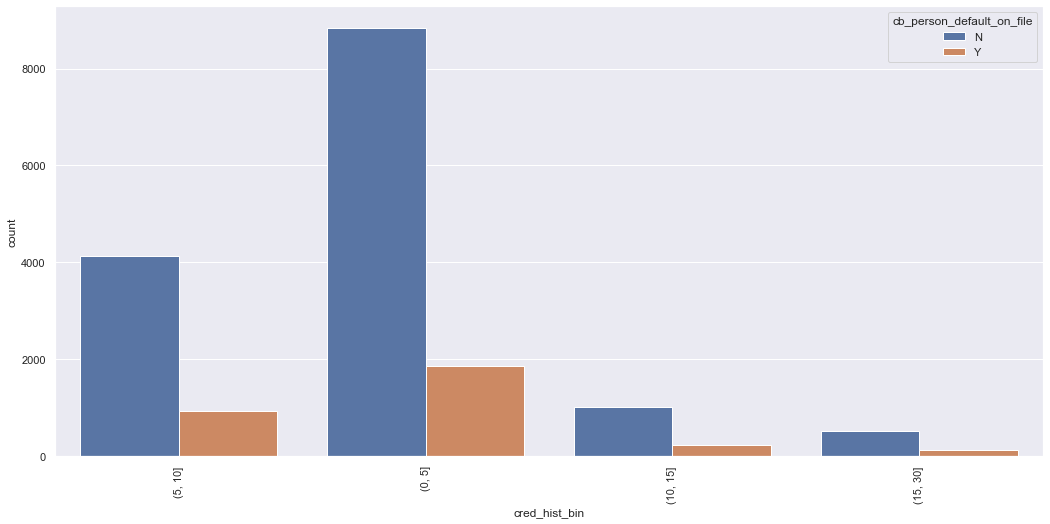

In [25]:
plot_categorical(train)

In [26]:
def plot_numerical(train):
    """this finction creates a bin for time since rest and plots the significant categorical features"""
    num_cols = [col for col in train if train[col].dtype != "O" ]
    for i, predictor in enumerate(num_cols):
        plt.figure(i)
        plot= sns.lmplot(data=train, y=predictor, x = "person_emp_length" )
        sns.set(rc={'figure.figsize':(17.7,8.27)})

    return plot


<Figure size 1274.4x595.44 with 0 Axes>

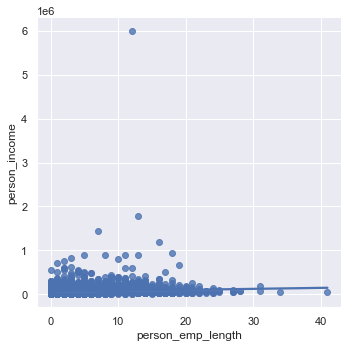

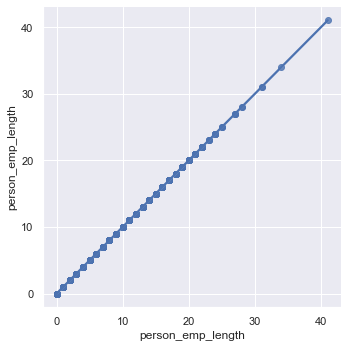

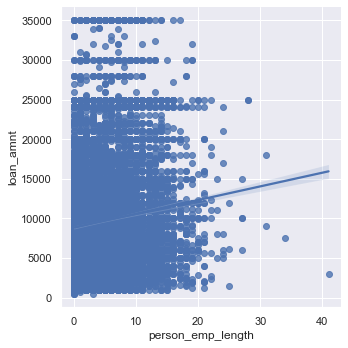

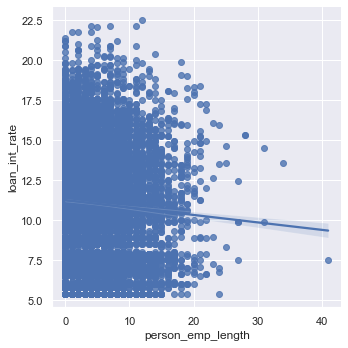

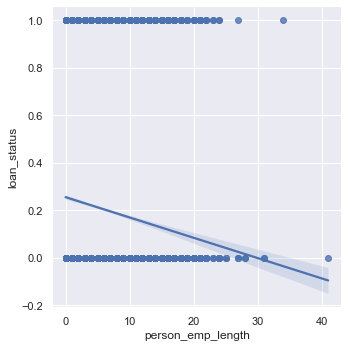

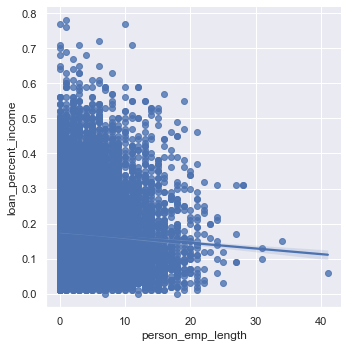

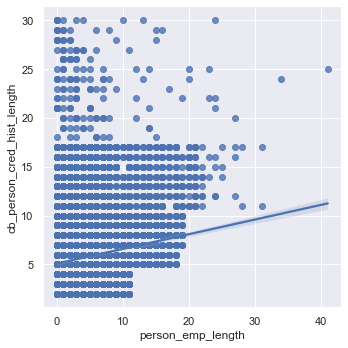

In [27]:
plot_numerical(train)

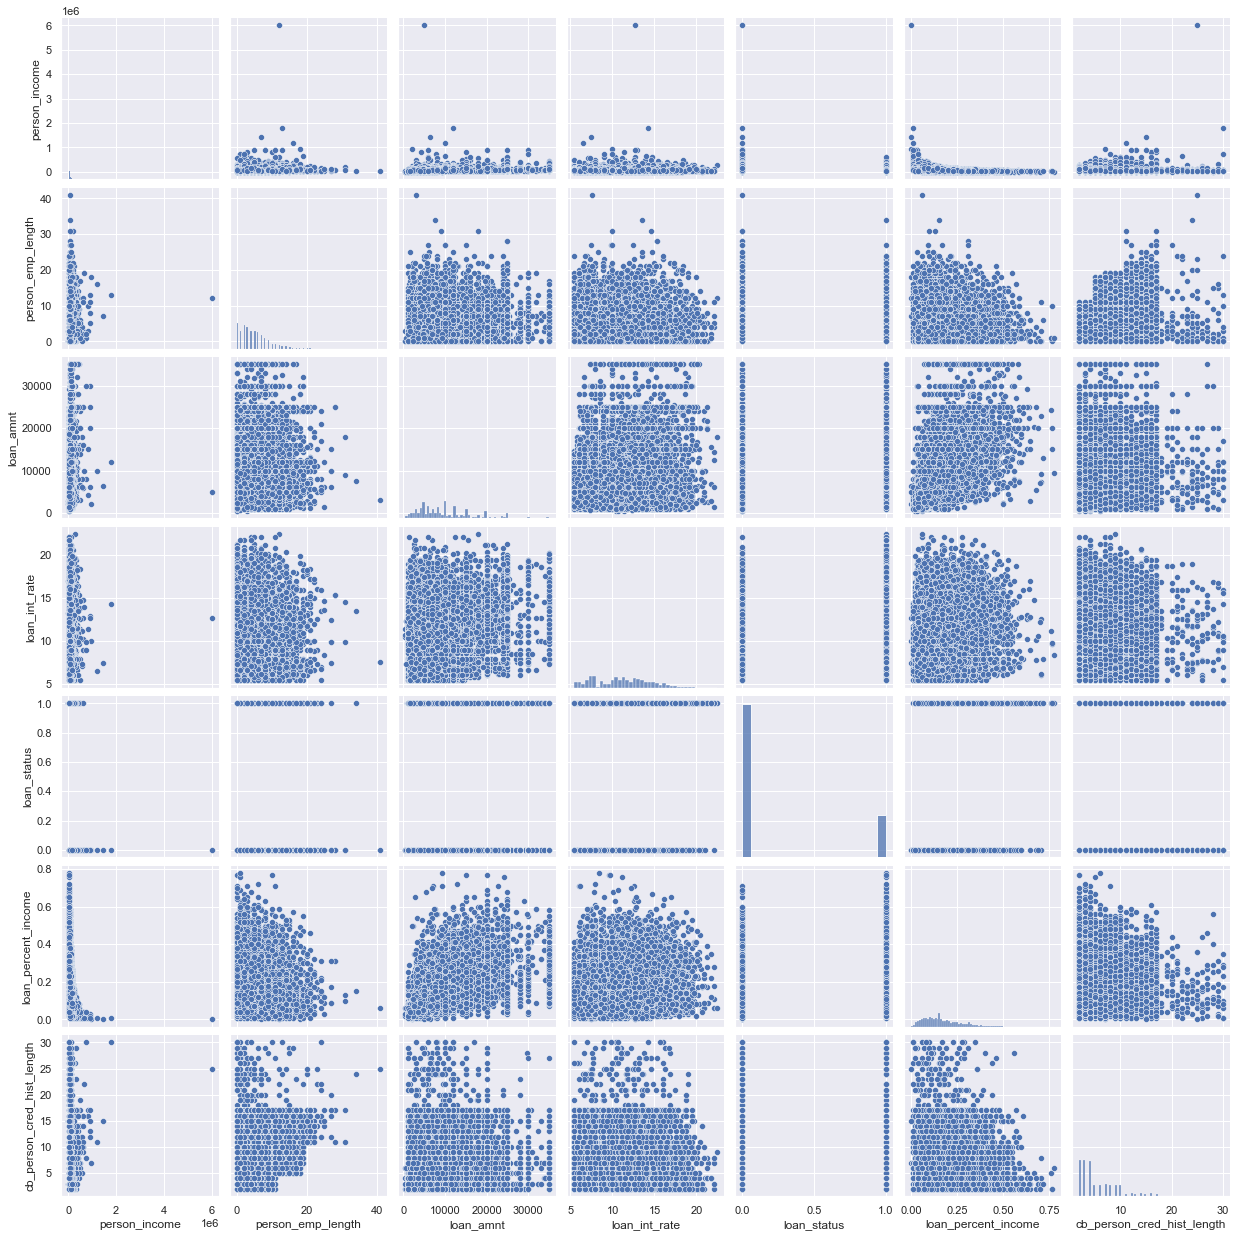

In [28]:
sns.pairplot(data = train)

In [29]:
# setting up the data for modeling
X_train = train.drop(columns = ["loan_status"])
y_train = train.loan_status

X_validate = validate.drop(columns = ["loan_status"])
y_validate = validate.loan_status

X_test = test.drop(columns = ["loan_status"])
y_test = test.loan_status

In [30]:
num_cols = [col for col in X_train if X_train[col].dtype != "O" ]
cat_cols = [col for col in train if train[col].dtype == "O" ]


In [31]:
# impute numerical cols 
num_pipe= Pipeline([("impute", IterativeImputer()),
                   ("scale", StandardScaler())])

In [32]:
ct = ColumnTransformer([("num_pipe", num_pipe, num_cols),
                       ("cat_cols", OneHotEncoder(sparse = False, handle_unknown = "ignore"), cat_cols)
                       ], remainder = "passthrough")



In [33]:
# combining multiple models as a dictionary
grid ={
    RandomForestClassifier(random_state = 0, n_jobs = -1, class_weight = "balanced"):
    {"model__n_estimators": [300,400,500],
     "coltf__num_pipe__impute__estimator": [LinearRegression(), RandomForestRegressor(random_state = 0),
                                           KNeighborsRegressor()]},
    LGBMClassifier(class_weight = "balanced", random_state = 0, n_jobs = -1):
    {"model__n_estimators": [300,400,500],
     "model__learning_rate":[0.001,0.01,0.1,1,10],
     "model__boosting_type": ["gbdt", "goss","dart"],
     "coltf__num_pipe__impute__estimator": [LinearRegression(), RandomForestRegressor(random_state = 0),
                                           KNeighborsRegressor()]},
}



In [34]:
# iterating through the dictionary of classifiers aka grid()
for clf, param in grid.items():
    print(clf)
    print("-"*50)
    print(param)
    print("\n")

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=0)
--------------------------------------------------
{'model__n_estimators': [300, 400, 500], 'coltf__num_pipe__impute__estimator': [LinearRegression(), RandomForestRegressor(random_state=0), KNeighborsRegressor()]}


LGBMClassifier(class_weight='balanced', random_state=0)
--------------------------------------------------
{'model__n_estimators': [300, 400, 500], 'model__learning_rate': [0.001, 0.01, 0.1, 1, 10], 'model__boosting_type': ['gbdt', 'goss', 'dart'], 'coltf__num_pipe__impute__estimator': [LinearRegression(), RandomForestRegressor(random_state=0), KNeighborsRegressor()]}




In [35]:
df["loan_status"].value_counts(normalize = True)

0    0.781312
1    0.218688
Name: loan_status, dtype: float64

In [36]:
y_train.value_counts(normalize = True)

0    0.78516
1    0.21484
Name: loan_status, dtype: float64

In [37]:
y_test.value_counts(normalize = True)

0    0.780537
1    0.219463
Name: loan_status, dtype: float64

In [40]:
np.round(X_train.isna().sum()*100/X_train.shape[0], 3)

person_income                 0.000
person_home_ownership         0.000
person_emp_length             0.000
loan_intent                   0.000
loan_grade                    0.000
loan_amnt                     0.000
loan_int_rate                 9.346
loan_percent_income           0.000
cb_person_default_on_file     0.000
cb_person_cred_hist_length    0.000
cred_hist_bin                 0.000
dtype: float64

In [42]:
full_df =pd.DataFrame()
best_algos = {}

for clf, param in grid.items():
    pipe = Pipeline([
        ("coltf", ct),
        ("model", clf)
    ])
    
    gs = RandomizedSearchCV(estimator = pipe, param_distributions = param, scoring = "accuracy", 
                           n_jobs = -1, verbose = 3, n_iter = 4, random_state = 0)
    gs.fit(X_train, y_train)

    all_res = pd.DataFrame(gs.cv_results_)

    temp = all_res.loc[:,["params", "mean_test_score"]]
    algo_name = str(clf).split('(')[0]
    temp["algo"] = algo_name
    
    full_df = pd.concat([full_df, temp], ignore_index= True)
    best_algos[algo_name] = gs.best_estimator_
    
    
        
        
        
        
        
        

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [43]:
full_df.sort_values("mean_test_score", ascending = False)

,params,mean_test_score,algo
3,"{'model__n_estimators': 400, 'coltf__num_pipe_...",0.932087,RandomForestClassifier
2,"{'model__n_estimators': 400, 'coltf__num_pipe_...",0.931804,RandomForestClassifier
0,"{'model__n_estimators': 400, 'coltf__num_pipe_...",0.931691,RandomForestClassifier
1,"{'model__n_estimators': 500, 'coltf__num_pipe_...",0.931521,RandomForestClassifier
7,"{'model__n_estimators': 300, 'model__learning_...",0.920589,LGBMClassifier
5,"{'model__n_estimators': 300, 'model__learning_...",0.911923,LGBMClassifier
4,"{'model__n_estimators': 300, 'model__learning_...",0.908808,LGBMClassifier
6,"{'model__n_estimators': 300, 'model__learning_...",0.907788,LGBMClassifier
